In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
max_lr = 3e-4
min_lr = max_lr * 0.1
warmup_step = 10
max_steps = 50

In [3]:
def get_lr(it):
    # 1) 在前 warmup_step 的迭代中  从 min_lr 开始线性增长
    if it < warmup_step:
        return max_lr * (it + 1) / warmup_step
    # 2) 超过总迭代次数后  稳定在 min_lr
    if it > max_steps:
        return min_lr
    # 3) 在中间  学习率以 cos 的方式下降
    decay_ratio = (it - warmup_step) / (max_steps - warmup_step)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio))
    return min_lr + coeff * (max_lr - min_lr)

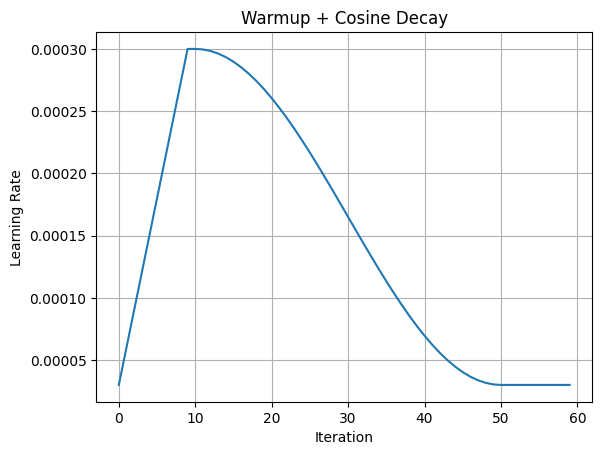

In [4]:
lrs = [get_lr(i) for i in range(60)]
plt.plot(lrs)
plt.title("Warmup + Cosine Decay")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()